# scqubits example: cos2phi qubit
J. Koch and P. Groszkowski <br>Xinyuan You

For further documentation of scqubits see https://scqubits.readthedocs.io/en/latest/.

---

In [1]:
import numpy as np
import scqubits as scq

scq.GUI()

Output(layout=Layout(width='100%'))

# cos2phi qubit

$H = 2 E_\text{CJ}'n_\phi^2 + 2 E_\text{CJ}' (n_\theta - n_\text{g} - n_\zeta)^2 + 4 E_\text{C} n_\zeta^2
         + E_\text{L}'(\phi - \pi\Phi_\text{ext}/\Phi_0)^2 + E_\text{L}' \zeta^2 - 2 E_\text{J}\cos{\theta}\cos{\phi} \\
         + 2 dE_\text{J} E_\text{J}\sin{\theta}\sin{\phi} 
         - 4 dC_\text{J} E_\text{CJ}' n_\phi (n_\theta - n_\text{g}-n_\zeta) 
         + dL E_\text{L}'(2\phi - \varphi_\text{ext})\zeta,$
         
where $E_\text{CJ}' = E_\text{CJ} / (1 - dC_\text{J})^2$ and $E_\text{L}' = E_\text{L} / (1 - dL)^2$.

To numerically diagonalize the Hamiltonian of the cos2phi qubit, the harmonic basis is used for both the $\phi$ and $\zeta$ variables, and the charge basis is used for the $\theta$ variable.

With ipywidgets installed, a cos2phi qubit instance can be created with:

In [2]:
cos2phi_qubit = scq.Cos2PhiQubit.create()

Output()

From figure above, we can see that cos2phi can be viewed as a $0-\pi$ qubit with maximum disorder in shunt capacitors.

Benifits of cos2phi qubit: When biased at half flux quantum, it is protected from dielectric loss, charge noise and flux noise. However, it suffers from inductive loss, see https://bpb-us-e1.wpmucdn.com/sites.northwestern.edu/dist/2/1168/files/2022/01/Xinyuan-You-2021.pdf page 80 for more details.

Alternatively, the qubit instance can be crated with:

In [3]:
cos2phi_qubit = scq.Cos2PhiQubit(EJ = 15.0,
                                 ECJ = 2.0,
                                 EL = 1.0,
                                 EC = 0.04,
                                 dCJ = 0.0,
                                 dL = 0.0,
                                 dEJ = 0.0,
                                 flux = 0.5,
                                 ng = 0.0,
                                 ncut = 10,
                                 phi_cut = 10,
                                 zeta_cut = 30)

In [4]:
print(cos2phi_qubit)

Cos2PhiQubit--------| [Cos2PhiQubit_2]
                    | EJ: 15.0
                    | ECJ: 2.0
                    | EL: 1.0
                    | EC: 0.04
                    | dCJ: 0.0
                    | dL: 0.0
                    | dEJ: 0.0
                    | flux: 0.5
                    | ng: 0.0
                    | ncut: 10
                    | zeta_cut: 30
                    | phi_cut: 10
                    |
                    | dim: 6300



### Potential energy
evaluated for $\zeta=0$

(<Figure size 800x200 with 2 Axes>,
 <Axes: xlabel='$\\phi$', ylabel='$\\theta$'>)

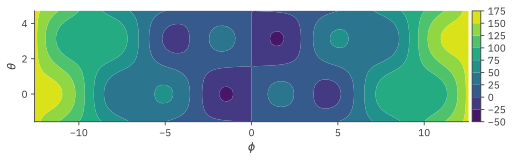

In [5]:
cos2phi_qubit.plot_potential()

### Eigenenergies

In [6]:
cos2phi_qubit.dL = 0.0
cos2phi_qubit.n_cut = 10
cos2phi_qubit.phi_cut = 10


In [7]:
cos2phi_qubit.eigenvals(evals_count=10)

array([15.03653961, 15.03690899, 15.80052175, 15.80454779, 16.55940642,
       16.57712842, 17.31519189, 17.35325157, 18.08363585, 18.11695482])

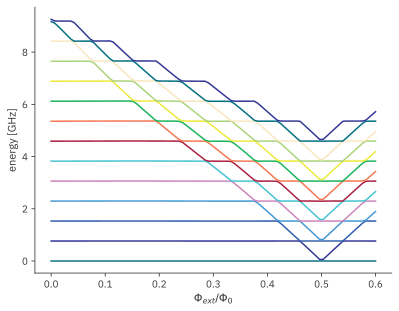

In [8]:
flux_list = np.linspace(0, 0.6, 100)
cos2phi_qubit.plot_evals_vs_paramvals('flux', flux_list, evals_count=14, subtract_ground=True);

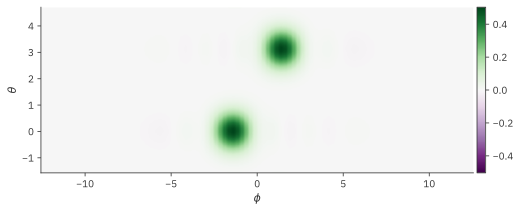

In [9]:
fig, ax = cos2phi_qubit.plot_wavefunction(which=0, mode='real', zero_calibrate=True)

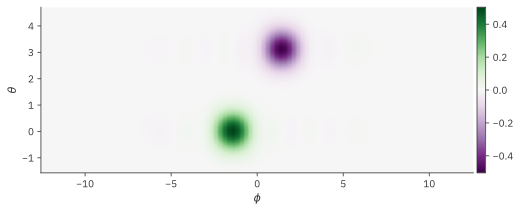

In [10]:
fig, ax = cos2phi_qubit.plot_wavefunction(which=1, mode='real', zero_calibrate=True)

### Matrix element

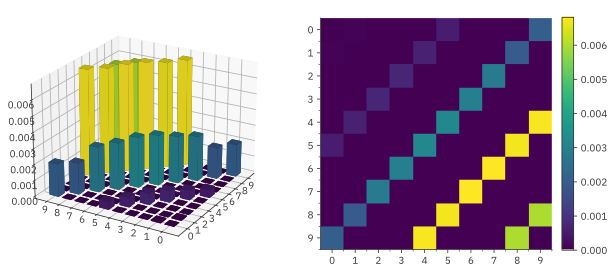

In [11]:
cos2phi_qubit.plot_matrixelements('n_phi_operator', evals_count=10);

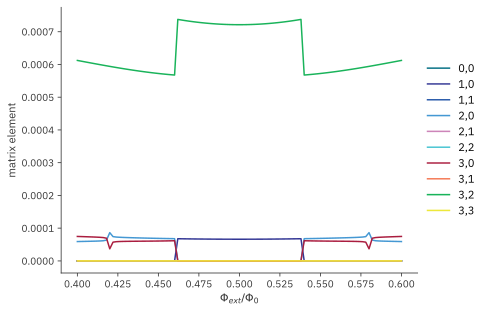

In [12]:
flux_list = np.linspace(0.4, 0.6, 101)
fig, ax = cos2phi_qubit.plot_matelem_vs_paramvals('n_phi_operator', 'flux', flux_list, select_elems=4)